# The numpy.random package 

## Programming for Data Analysis Assignment

### Andrew Walker - G00398788@gmit.ie

![numpy.org](https://numpy.org/doc/stable/_static/numpylogo.svg)

## 1. Introduction

This notebook contains an explanation of the ```numpy.random``` package in Python. 

NumPy is an open source project aiming to enable numerical computing with Python (https://numpy.org/about/). It is used for working with arrays and also has functions for working in the domain of linear algebra, fourier transform, and matrices (https://www.w3schools.com/python/numpy/numpy_intro.asp). In has applications in a wide range of fields such as astronomy, physics, engineering, and economics. 

The ```numpy.random``` package within NumPy is used to generate a sequence of numbers which approximate the properties of random numbers. The sequence of numbers that is generated is statistically random and can be used in a wide range of applications.    

The package generates the sequence with the use of a BitGenerator and a Generator. The BitGenerator uses a seed to derive the initial state and create a sequence of statistically random numbers bits. The Generator converts the sequence of random bits for a BitGenerator into sequences of numbers that follow a specific probability distribution (https://numpy.org/doc/stable/reference/random/index.html). 

This notebook will explain the following overarching features of the ```numpy.random``` package:

- Simple random data
- Permutations
- The purpose of five Distribution functions
    - Uniform
    - Bell
    - ....
    - ....
    - ....
- The use of seeds in generating pseudo-random numbers

The notebook will explain each feature and the functions contained in each. It will use ........ 

```matplotlib.pyplot``` will also be used.....

At the time of writing this notebook, the latest release of ```numpy.random``` is 1.21.0. This contents of this notebook are based on this release.

## 2. Initalising the ```numpy.random``` Package

Import Numpy:

In [1]:
import numpy as np

Construct a new Generator with the default BitGenerator (PCG64): 

In [2]:
rng = np.random.default_rng()

A seed can be specified in ```default_rng```. The use of a known seed means that the the algorithm is repeatable. BitGenerators and seeds are discussed further in Section XXXXXX

Pyplot will also be used to allow plotting of outputs generated:

In [3]:
import matplotlib.pyplot as plt

## 3. Simple Random Data

The ```numpy.random``` package contains four functions to generate simple random data. These are discussed in this section.

### 3.1 Integers


Numpy can be instructed to return random integers. For example:

In [4]:
rng.integers(0, 3, size=5)

array([1, 0, 0, 1, 2], dtype=int64)

In this example, the first parameter (```0```) sets the lowest integer that is possible to be generated. The upper limit is defined by the second parameter (```3```); the highest integer that is possible to be generated is one lower than this number. The parameter ```size=5``` designates that 5 random numbers should be generated.  

The shape of the output can be changed by specifying the number of rows and columns. For example, a 5 x 5 array containing random numbers between 0 and 9 can be generated using the following:

In [5]:
rng.integers(0, 10, size=(5,5))


array([[6, 3, 0, 1, 1],
       [2, 6, 3, 5, 2],
       [9, 6, 7, 8, 1],
       [9, 1, 4, 0, 4],
       [3, 2, 4, 9, 1]], dtype=int64)

In these examples, the output also includes the data type: ```dtype=int64```. By default, Python has the following data types:

- strings
- integer
- float
- boolean
- complex

NumPy also includes a number of additional data types (discussion of which is considered outside the scope of this notebook). 

```dtype=int64``` refers to the output containing 64-bit integers. This can be changed, as shown in the following example to output 8-bit integers:

In [6]:
rng.integers(0, 10, size=(5,5), dtype='int8')

array([[8, 6, 2, 5, 0],
       [1, 5, 4, 3, 7],
       [1, 9, 1, 8, 4],
       [5, 0, 5, 4, 4],
       [1, 3, 9, 7, 7]], dtype=int8)

The integers are generated by default as a discrete probability distribution. This means that the probability of outcomes is equally likely and with finite values (https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/). 

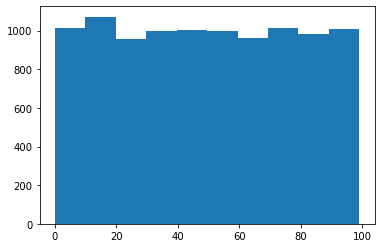

In [7]:
x = rng.integers(100, size=10000)
plt.hist(x)
plt.show()

### 2.2 Random

The Numpy random function returns random floats. For example:

In [8]:
rng.random()

0.8013408633094072

The size of output can be specified:

In [9]:
rng.random(size=(5,5))

array([[0.70618294, 0.40400973, 0.21528475, 0.09176591, 0.23989785],
       [0.545561  , 0.80766875, 0.92159009, 0.29002235, 0.16334848],
       [0.55898209, 0.04363708, 0.90061979, 0.97888785, 0.26372269],
       [0.84124155, 0.20022164, 0.10356596, 0.02281002, 0.49207841],
       [0.08796778, 0.145053  , 0.68192805, 0.40105958, 0.56814337]])

To specify the low and high values the formula ```(b + a) * rng.random() + a``` can be used. The following example outputs five floats between 0 (inclusive) and 3 (exclusive):

In [10]:
a = 0 #low value
b = 3 #high value
x = rng.random(size=(5,5)) 
y = (b + a) * x + a
y

array([[1.34584967, 1.59951218, 2.82318604, 0.25034209, 2.89460555],
       [2.99561673, 0.13724513, 0.56382926, 0.52981738, 1.33478258],
       [0.09085604, 0.51602755, 0.84759733, 0.0643116 , 0.28940788],
       [2.10037324, 0.43416736, 2.71728096, 2.64430738, 2.82452905],
       [2.26356154, 2.21369835, 2.76341539, 1.68456838, 2.0253789 ]])

Or for negative numbers between 0 (inclusive) and -1 (exclusive):

In [11]:
a = 0 
b = -1 
x = rng.random(size=(5,5)) 
y = (b + a) * x + a
y

array([[-0.42752296, -0.9560846 , -0.68853347, -0.57731291, -0.29297819],
       [-0.87759926, -0.75308999, -0.79743936, -0.9802681 , -0.46096396],
       [-0.60131602, -0.00800179, -0.08955815, -0.59529908, -0.77618577],
       [-0.12806298, -0.76833634, -0.48972206, -0.22482803, -0.63274091],
       [-0.40870185, -0.80923772, -0.66760125, -0.59477216, -0.27328953]])

However, for negative numbers not including 0, the formula must be changed slightly. For example, for negative numbers between -1 (inclusive) and -2 (exclusive):

In [12]:
a = -1 
b = -2 
x = rng.random(size=(5,5))  
y = (b - a) * x + a
y

array([[-1.01241514, -1.56273795, -1.84950686, -1.00128152, -1.19825151],
       [-1.75562668, -1.35173939, -1.64115924, -1.09800073, -1.54261482],
       [-1.06576453, -1.72966452, -1.43176375, -1.8588216 , -1.33087154],
       [-1.10935198, -1.86374446, -1.03078512, -1.41948861, -1.49533408],
       [-1.92027654, -1.87278661, -1.53058071, -1.53180711, -1.40068616]])

The floats are generated by default as a continuous probability distribution. This means that there are infinite number of equally likely measurable values. (https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/). 

<function matplotlib.pyplot.show(close=None, block=None)>

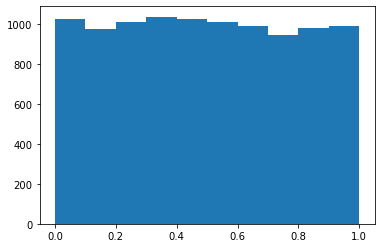

In [13]:
x = rng.random(size=10000)
plt.hist(x)
plt.show

### 2.3 Choice

The Numpy choice function generates a random sample from a given array. For example:

In [14]:
rng.choice(10, 5)

array([3, 2, 8, 9, 0], dtype=int64)

This returns an array of 5 integers between 0 and 9 (inclusive) and is the equivalent of ```rng.integers(0, 10, 5)```.

By default, the distribution is uniform, as shown below:

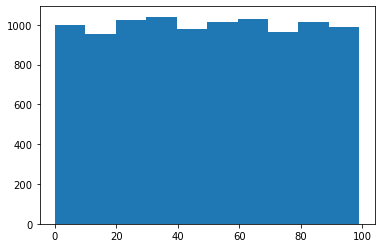

In [15]:
x = rng.choice(100, 10000)
plt.hist(x)
plt.show()

A non-uniform distribution can be generated by specifying parameter ```p``` for the probabilty of a choice occuring. For example:

In [16]:
rng.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])

array([3, 3, 2], dtype=int64)

In this example, there is a 10% chance of 0 occuring for any the three numbers generated, a 0% percentage chance for a 1, a 30% chance for a 2, a 60% chance for a 3, and a 0% chance for a 4. 

Specifying parameter ```replace=False``` will result in an individual number not occurring more than once in the output:

In [17]:
rng.choice(10, 10, replace=False)

array([9, 6, 0, 5, 3, 8, 2, 7, 4, 1], dtype=int64)

The axis along which the choice is performed can also be selected. The 0 axis refers to rows, and the 1 axis refers to columns (https://www.sharpsightlabs.com/blog/numpy-axes-explained/). The default is 0 is this parameter is not set. For example: 

In [18]:
x = rng.choice([[0,1,2], [3,4,5], [6,7,8], [9,'A','B'], ['C','D','E']], 5, axis=0)
x

array([['3', '4', '5'],
       ['C', 'D', 'E'],
       ['9', 'A', 'B'],
       ['0', '1', '2'],
       ['3', '4', '5']], dtype='<U11')

The above output contains five rows with three elements: 

In [19]:
(x.shape)

(5, 3)

Setting the axis to 1:

In [20]:
x = rng.choice([[0,1,2], [3,4,5], [6,7,8], [9,'A','B'], ['C','D','E']], 5, axis=1)
x

array([['1', '2', '1', '1', '1'],
       ['4', '5', '4', '4', '4'],
       ['7', '8', '7', '7', '7'],
       ['A', 'B', 'A', 'A', 'A'],
       ['D', 'E', 'D', 'D', 'D']], dtype='<U11')

The above output contains five rows with five columns:

In [21]:
(x.shape)

(5, 5)

The choice function is not restricted to integers. For example:

In [22]:
season = ['spring', 'summer', 'autumn', 'winter']
rng.choice(season, 4, p=[0.5, 0, 0, 0.5])

array(['spring', 'spring', 'spring', 'winter'], dtype='<U6')

### 2.4 Bytes

The Numpy bytes function returns random bytes, dependent on the specified length. The following example returns 10 bytes:

In [23]:
rng.bytes(10)


b'\xa5\x08\xc1\xa0?\xb7Y\xd8\xbb\x00'

The bytes are returned in hex and ASCII. Any two characters following an x character are hex characters making up 1 byte; any other characters are ASCII characters of 1 byte each. The initial b is a prefix for bytes, and the output is enclosed in matching single quotes ('). 

For example, ```b'\xfd\xd7\x17\xac\xa3Ig\xf0`\xa1'``` would be made up of the following for a total of 10 bytes:

- fd (hex)
- d7 (hex)
- 17 (hex)
- ac (hex)
- a3 (hex)
- I (ASCII)
- g (ASCII)
- f0 (hex)
- ` (ASCII)
- a1 (hex)

https://stackoverflow.com/questions/26802581/can-anyone-identify-this-encoding?rq=1
https://docs.python.org/3.4/reference/lexical_analysis.html#grammar-token-shortbytesitem

## 3. Permutations

The ```numpy.random``` package contains three methods for randomly permutating a sequence. These are discussed in this section. 

### 3.1 Shuffle

The Numpy shuffle function rearranges the order of a sequence's contents. For example, the following will return a sequence of numbers from 0 to 9 (inclusive) in a random order, as detailed in Section 2.3:

In [24]:
x = rng.choice(10, 10, replace=False)
x

array([8, 1, 0, 4, 2, 3, 9, 6, 5, 7], dtype=int64)

The squence order is then rearranged using the shuffle function:

In [25]:
rng.shuffle(x)
x

array([8, 2, 0, 1, 9, 3, 6, 5, 7, 4], dtype=int64)

The shuffle function can also rearrange the sequence of arrays:

In [26]:
x = np.arange(0, 25).reshape(5, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [27]:
rng.shuffle(x)
x

array([[20, 21, 22, 23, 24],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [ 0,  1,  2,  3,  4]])

By default, the axis parameter is set to zero. As can be seen in the above example, by default, the shuffle function will shuffle the order the rows, but not the order of the columns. 

In the below example, the axis is set to 1:

In [28]:
x = np.arange(0, 25).reshape(5, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [29]:
rng.shuffle(x, axis=1)
x

array([[ 4,  0,  2,  1,  3],
       [ 9,  5,  7,  6,  8],
       [14, 10, 12, 11, 13],
       [19, 15, 17, 16, 18],
       [24, 20, 22, 21, 23]])

This results in a shuffling of the contents of the columns, but the row order remaining the same.

### 3.2 Permutation

The Numpy permutation function returns either a randomly permuted sequence, as shown in the example below:

In [30]:
rng.permutation(10)


array([5, 6, 0, 4, 1, 3, 2, 8, 9, 7])

Or can rearrange the sequence of arrays:

In [31]:
x = np.arange(0, 25).reshape(5, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [32]:
y = rng.permutation(x)
y

array([[20, 21, 22, 23, 24],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [ 0,  1,  2,  3,  4],
       [15, 16, 17, 18, 19]])

By default, the axis parameter is set to zero. As can be seen in the above example, by default, the permutation function will rearrange the order the rows, but not the order of the columns. 

In the below example, axis is set to 1:

In [33]:
x = np.arange(0, 25).reshape(5, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [34]:
y = rng.permutation(x, axis=1)
y

array([[ 4,  2,  1,  0,  3],
       [ 9,  7,  6,  5,  8],
       [14, 12, 11, 10, 13],
       [19, 17, 16, 15, 18],
       [24, 22, 21, 20, 23]])

As with the shuffle function, this results in a shuffling of the contents of the columns but the row order remaining the same.

### 3.2.2 Difference between Shuffle and Permutation Functions

At first glance, the shuffle and permutation functions appear to perform similarly - both randomly rearrage a sequence or arrays. However, the key difference is that the shuffle function operates in-place, whereas the permutation function returns a copy (https://numpy.org/doc/stable/reference/random/generator.html). (https://jman4190.medium.com/explaining-the-inplace-parameter-for-beginners-5de7ffa18d2e).

The in-place operation of the shuffle function means that dataframe is overwritten with the output of the function, when it is performed, For example, a sequence of numbers 0 to 9 can be generated as the variable x:

In [35]:
x = np.arange(10)

The output of x is shown as the sequence:

In [36]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The shuffle function can then be performed:

In [37]:
rng.shuffle(x)


The variable x now contains the random sequence generated by the shuffle function:

In [38]:
x

array([9, 6, 5, 2, 7, 4, 1, 8, 0, 3])

The original sequence contained in x has now been overwritten and calling the variable x again will produce the same output as above and the original sequence is no longer stored:

In [39]:
x

array([9, 6, 5, 2, 7, 4, 1, 8, 0, 3])

Performing the shuffle function on x a further time would overwrite x again. 

However, the permutation function operates differently and produces a copy of the original data. For example, taking the same sequence of 0 to 9:

In [40]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The permutation function can be called on x to output a random sequence:

In [41]:
rng.permutation(x)

array([9, 2, 1, 5, 8, 6, 7, 4, 0, 3])

However, using the permutation function, the variable x contains the original data which has not been overwritten:

In [42]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

This could be useful if the original data is to be kept, but also a new sequence generated. For example:

In [43]:
y = rng.permutation(x)

In [44]:
x, y 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([8, 1, 6, 2, 5, 0, 3, 4, 7, 9]))

### 3.3 Permuted

In [45]:
x = np.arange(0, 25).reshape(5, 5)

In [46]:
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [47]:
rng.permuted(x, axis=0)

array([[10, 21, 22, 13, 14],
       [ 5,  1,  7, 23,  4],
       [20,  6, 17, 18, 24],
       [ 0, 16, 12,  8,  9],
       [15, 11,  2,  3, 19]])

In [48]:
rng.permuted(x, axis=1)

array([[ 1,  4,  2,  3,  0],
       [ 8,  5,  6,  9,  7],
       [12, 11, 13, 14, 10],
       [19, 16, 18, 15, 17],
       [24, 20, 22, 21, 23]])

In [49]:
rng.permutation(x, axis=0)

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [ 0,  1,  2,  3,  4],
       [15, 16, 17, 18, 19],
       [ 5,  6,  7,  8,  9]])

In [50]:
rng.permutation(x, axis=1)

array([[ 3,  0,  4,  1,  2],
       [ 8,  5,  9,  6,  7],
       [13, 10, 14, 11, 12],
       [18, 15, 19, 16, 17],
       [23, 20, 24, 21, 22]])

In [51]:
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [52]:
rng.shuffle(x, axis=1)

In [53]:
x

array([[ 2,  4,  3,  1,  0],
       [ 7,  9,  8,  6,  5],
       [12, 14, 13, 11, 10],
       [17, 19, 18, 16, 15],
       [22, 24, 23, 21, 20]])

In [54]:
#3d array (https://stackoverflow.com/questions/62734866/how-to-create-a-3d-array-in-python-with-numpy)


In [79]:
#z = np.array([[[0, 1, 2], [3, 4, 5], [6, 7, 8]], [[9, 10, 11], [12, 13, 14], [15, 16, 17]], [[18, 19, 20], [21, 22, 23], [24,25,26]]])
z = np.array([[[0, 1], [2, 3], [4, 5]], [[6, 7], [8, 9], [10, 11]], [[12, 13], [14, 15], [16, 17]], [[18, 19], [20, 21], [22,23]]])
z

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [80]:
z.shape

(4, 3, 2)

In [121]:
rng.permuted(z, axis=2)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 7,  6],
        [ 9,  8],
        [10, 11]],

       [[13, 12],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [23, 22]]])

In [123]:
rng.permutation(z, axis=2)

array([[[ 1,  0],
        [ 3,  2],
        [ 5,  4]],

       [[ 7,  6],
        [ 9,  8],
        [11, 10]],

       [[13, 12],
        [15, 14],
        [17, 16]],

       [[19, 18],
        [21, 20],
        [23, 22]]])

In [102]:
a = np.arange(0, 25).reshape(5, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [105]:
rng.permuted(a, axis=0)

array([[ 0, 11,  7, 13, 19],
       [15,  6, 22, 23, 14],
       [ 5, 21,  2, 18, 24],
       [20, 16, 17,  3,  4],
       [10,  1, 12,  8,  9]])

In [106]:
rng.permutation(a, axis=0)

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [ 5,  6,  7,  8,  9],
       [20, 21, 22, 23, 24],
       [15, 16, 17, 18, 19]])

```numpy.random``` uses a seed to derive the initial state with a sequence of statistcally random numbers generated from this known starting point; the use of a known seed means that the the algorithm is repeatable. 

Therefore, the numbers generated are not completely random and are known as "pseudo-random numbers".